In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# 2. Load the Datasets
# Check if the file paths are correct and if the files exist in the specified location.
# If the files are in a different directory, update the paths accordingly.
# For example, if the files are in the current working directory:
matches = pd.read_csv('/content/IPL_matches.csv')
deliveries = pd.read_csv('/content/IPL_deliveries.csv')

In [ ]:
# 3. Quick Glance at Data
print(matches.shape)
print(deliveries.shape)
print(matches.columns)
print(deliveries.columns)

(1095, 20)
(260920, 17)
Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [ ]:
# 4. Data Cleaning
# Check missing values
print(matches.isnull().sum())
print(deliveries.isnull().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


In [ ]:
# Fill missing winner team names with "No Result"
matches['winner'].fillna('No Result', inplace=True)

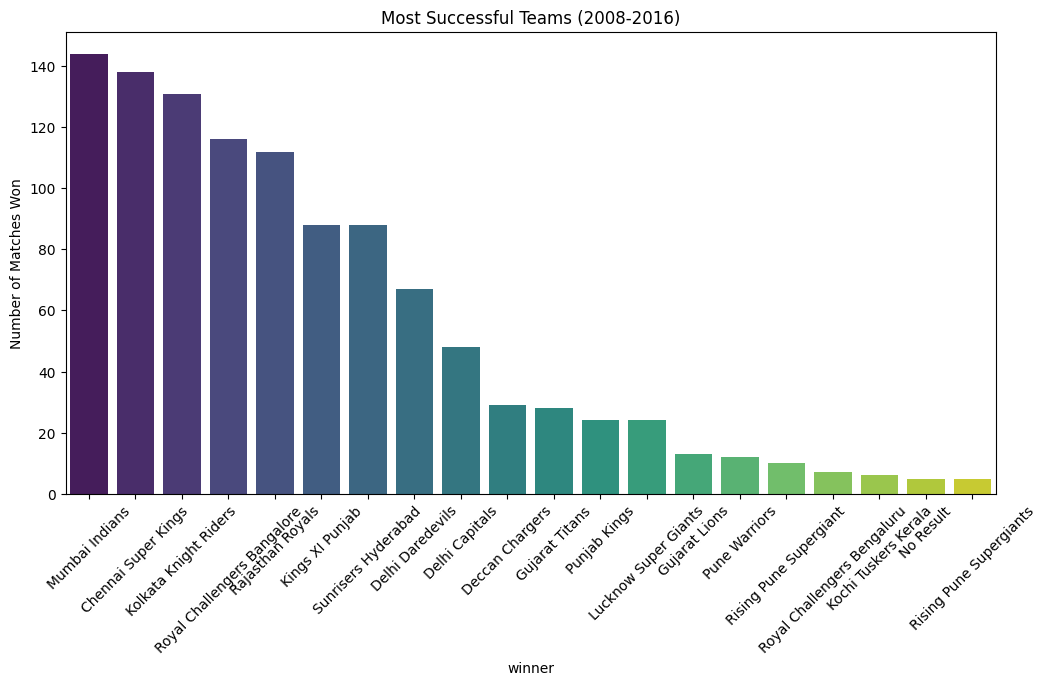

In [ ]:
# 5. Exploratory Data Analysis (EDA)

# 5.1 Most Successful Teams
team_wins = matches['winner'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Most Successful Teams (2008-2016)')
plt.ylabel('Number of Matches Won')
plt.show()

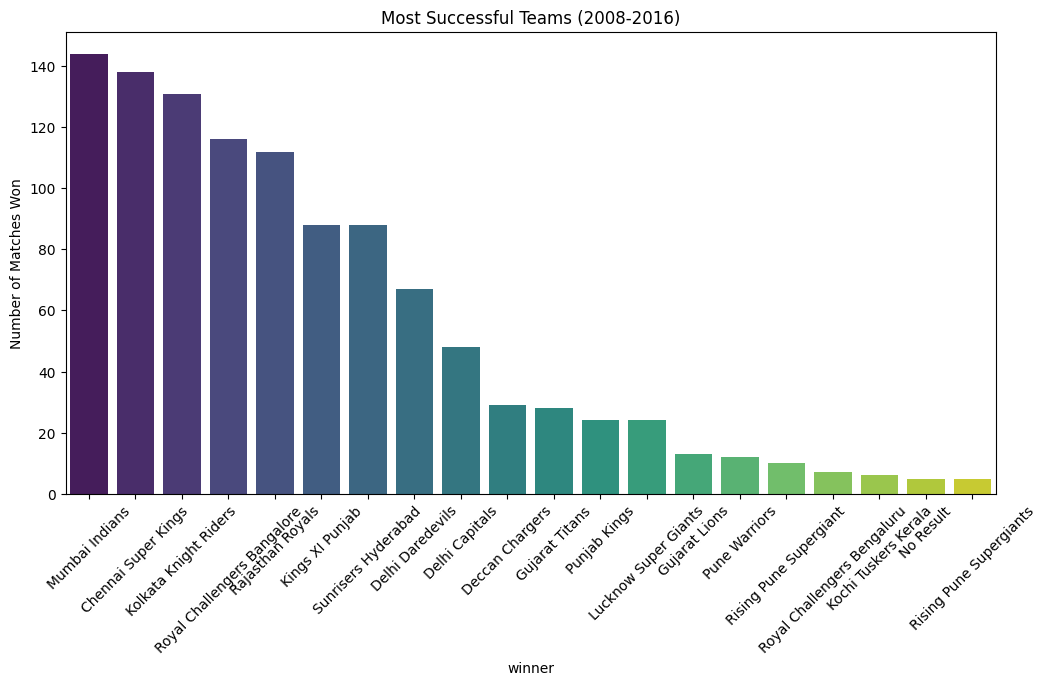

In [ ]:
# 5. Exploratory Data Analysis (EDA)

# 5.1 Most Successful Teams
team_wins = matches['winner'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Most Successful Teams (2008-2016)')
plt.ylabel('Number of Matches Won')
plt.show()

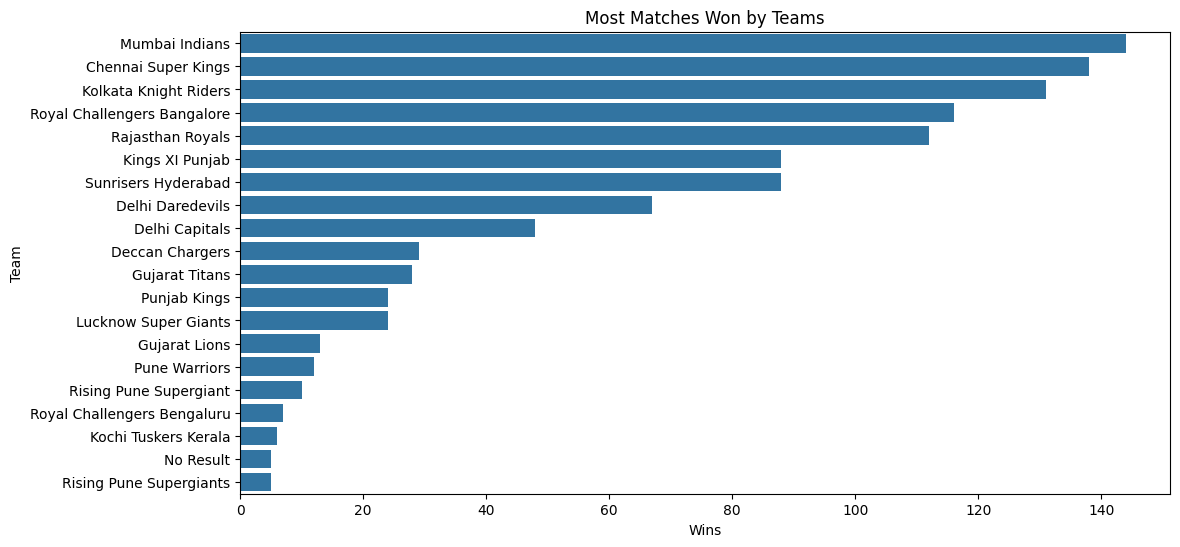

In [ ]:
plt.figure(figsize=(12,6)) #Match-Winning Team Count
sns.countplot(data=matches, y='winner', order=matches['winner'].value_counts().index)
plt.title("Most Matches Won by Teams")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()

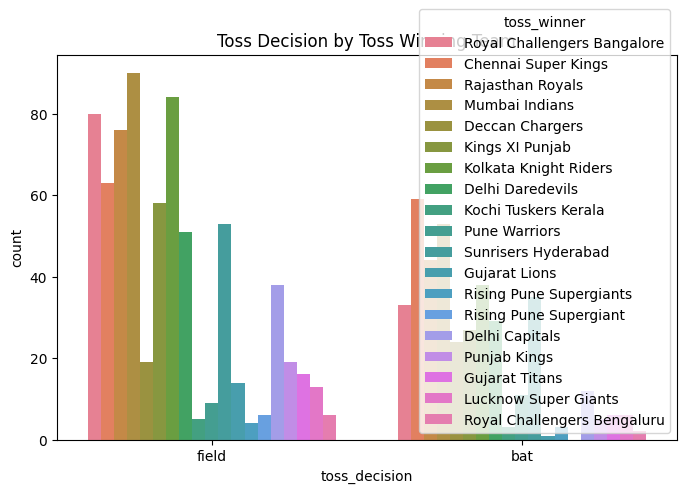

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=matches, x='toss_decision', hue='toss_winner')
plt.title("Toss Decision by Toss Winning Team")
plt.show() #Toss Decision Analysis

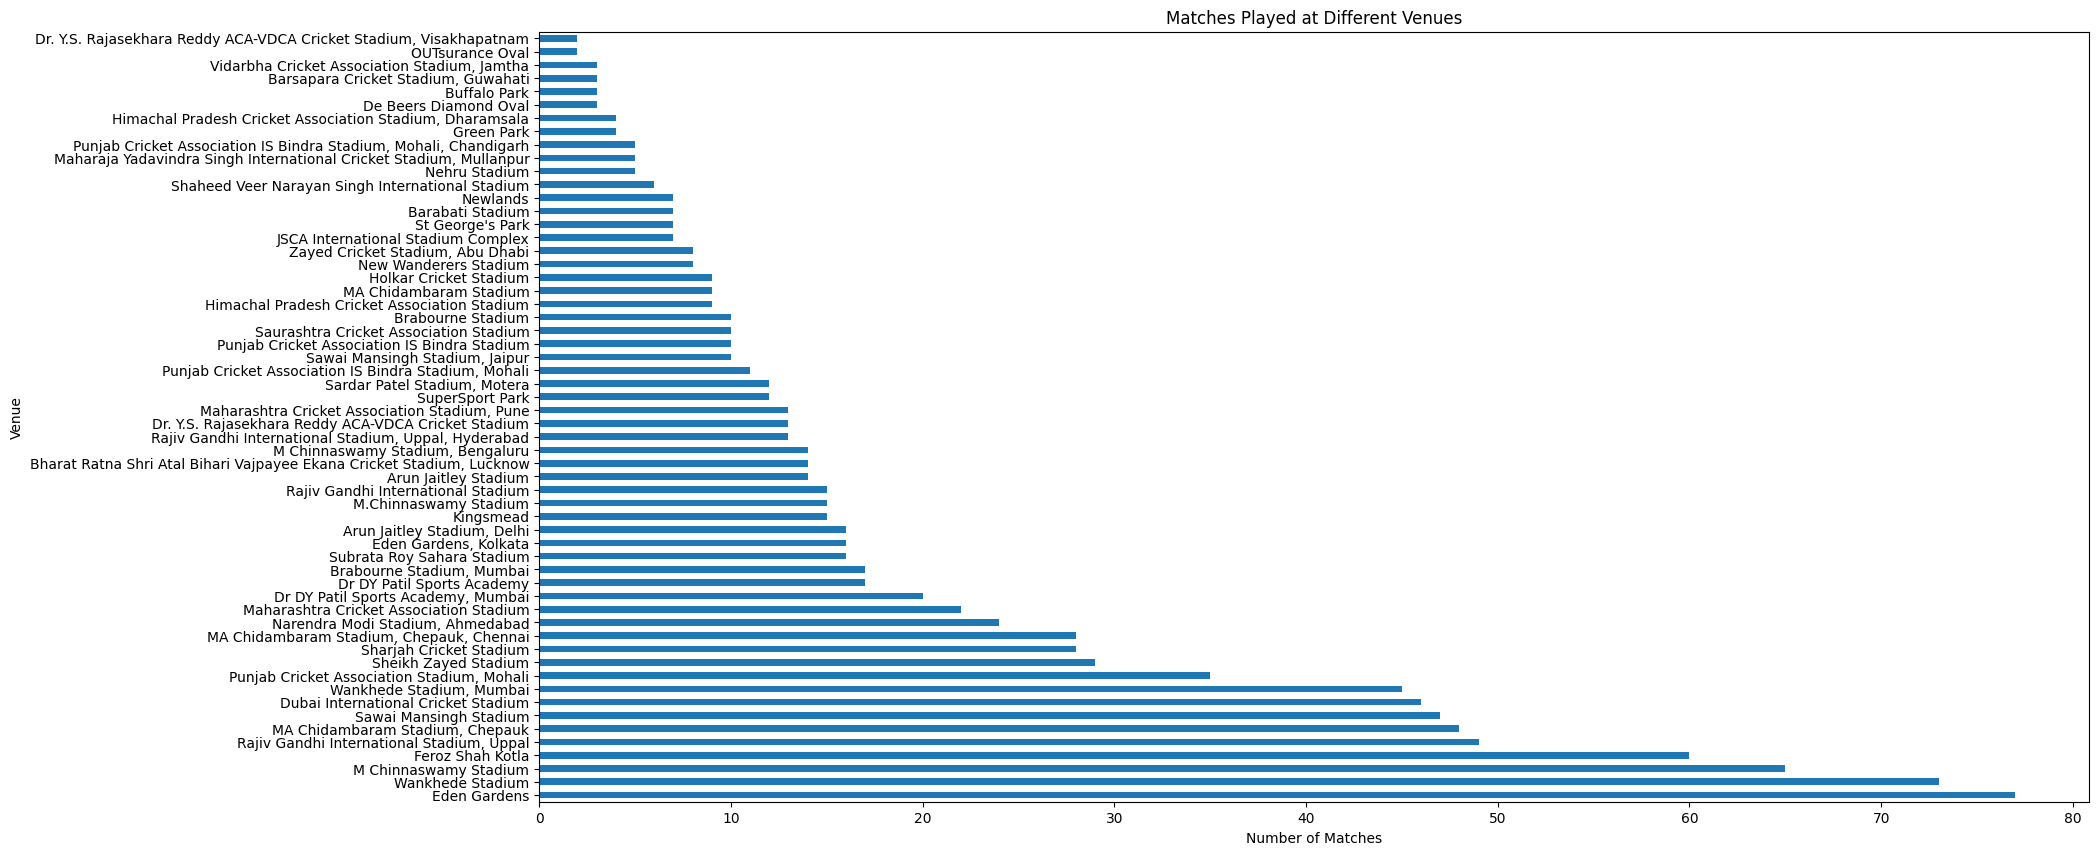

In [ ]:
plt.figure(figsize=(20,10)) #Venue with Most Matches
matches['venue'].value_counts().plot(kind='barh')
plt.title("Matches Played at Different Venues")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()

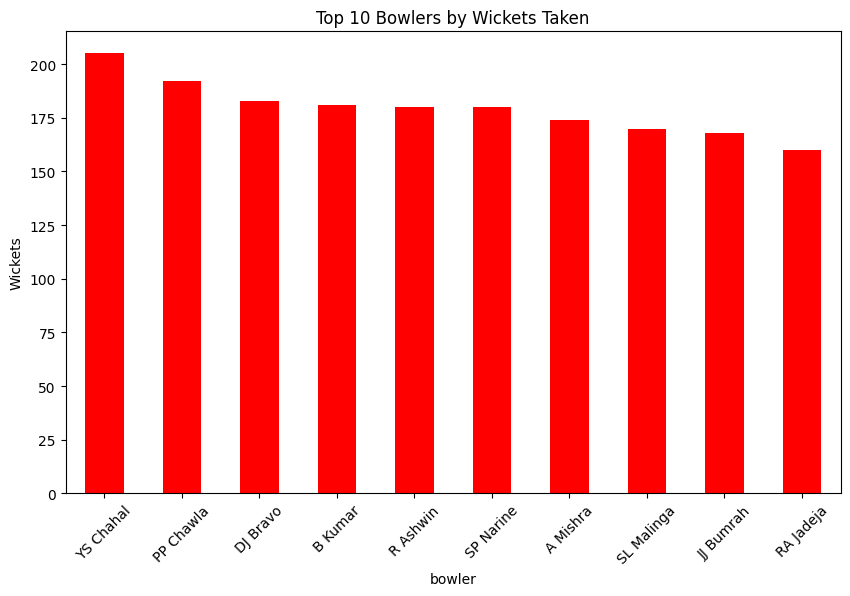

In [ ]:
## 5.3 Top Bowlers
wickets = deliveries[deliveries['dismissal_kind'].isin(['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
top_bowlers = wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='bar', figsize=(10,6), color='red')
plt.title('Top 10 Bowlers by Wickets Taken')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.show()

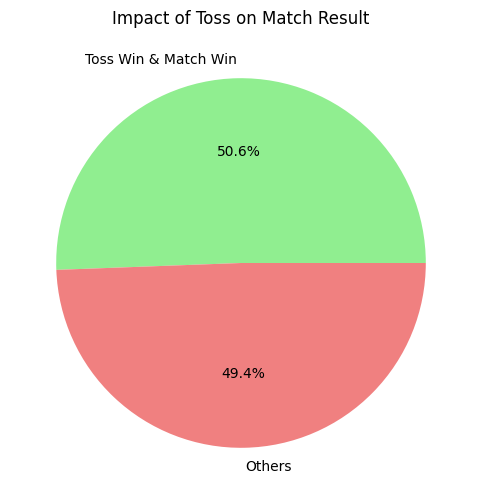

In [ ]:
## 5.4 Toss Win vs Match Win
toss_wins = matches[matches['toss_winner'] == matches['winner']]
plt.figure(figsize=(6,6))
plt.pie([len(toss_wins), len(matches) - len(toss_wins)], labels=['Toss Win & Match Win', 'Others'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Impact of Toss on Match Result')
plt.show()

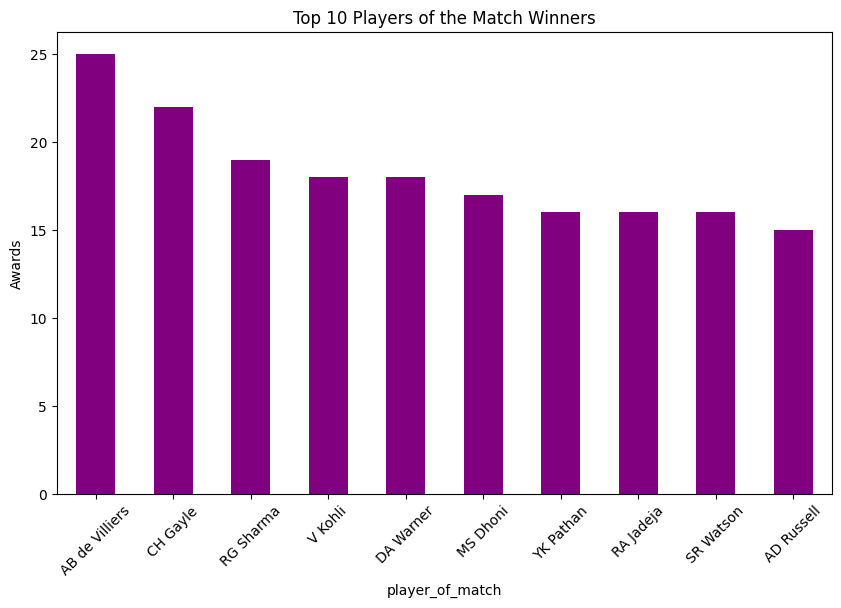

In [ ]:
## 5.5 Player of the Match Awards
top_players = matches['player_of_match'].value_counts().head(10)
top_players.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('Top 10 Players of the Match Winners')
plt.ylabel('Awards')
plt.xticks(rotation=45)
plt.show()

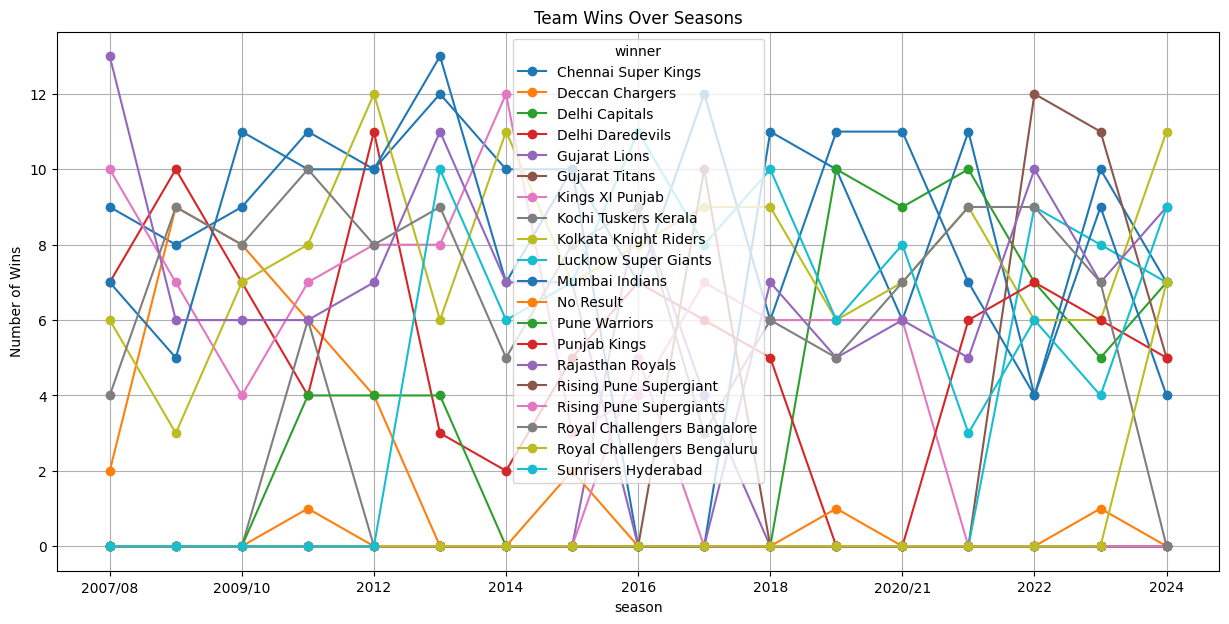

In [ ]:
# 6. Advanced Analysis

## 6.1 Team-wise Wins Per Season
team_year = matches.pivot_table(index='season', columns='winner', aggfunc='size', fill_value=0)
team_year.plot(kind='line', figsize=(15,7), marker='o')
plt.title('Team Wins Over Seasons')
plt.ylabel('Number of Wins')
plt.grid(True)
plt.show()

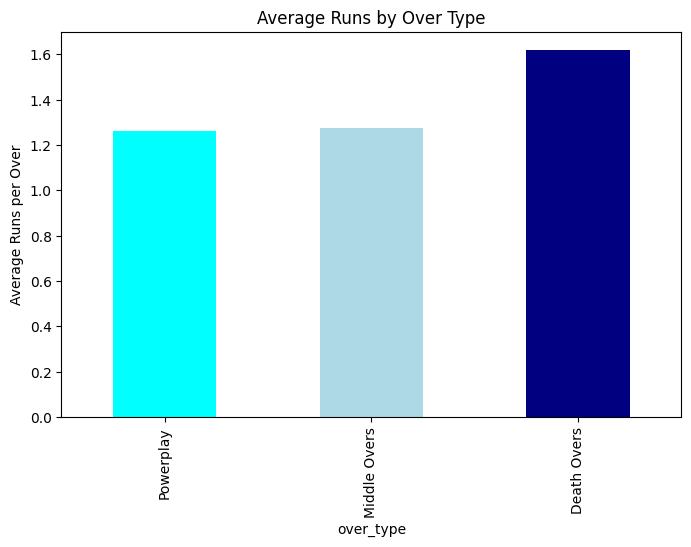

In [ ]:
## 6.2 Powerplay vs Death Overs (0-6, 16-20 overs)
deliveries['over_type'] = pd.cut(deliveries['over'], bins=[0,6,16,20], labels=['Powerplay','Middle Overs','Death Overs'], right=False)

over_type_runs = deliveries.groupby('over_type')['total_runs'].mean()
over_type_runs.plot(kind='bar', figsize=(8,5), color=['cyan','lightblue','navy'])
plt.title('Average Runs by Over Type')
plt.ylabel('Average Runs per Over')
plt.show()


In [ ]:
# 7. Bonus Interactive Plot using Plotly

fig = px.bar(x=team_wins.index, y=team_wins.values, title='Most Successful IPL Teams (Interactive)', labels={'x':'Teams', 'y':'Wins'}, color=team_wins.values, color_continuous_scale='Blues')
fig.show()


In [ ]:
# Feature Engineering
matches['toss_win'] = np.where(matches['toss_winner'] == matches['team1'], 1, 0)
matches['match_win'] = np.where(matches['winner'] == matches['team1'], 1, 0)

In [ ]:
# Let's select features
features = matches[['toss_win', 'toss_decision']]
features['toss_decision'] = features['toss_decision'].map({'bat':0, 'field':1})
target = matches['match_win']

In [ ]:
# Drop rows where toss_decision is missing
features.dropna(inplace=True)
target = target[features.index]

In [ ]:
# Import the necessary library
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [ ]:
# Model
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predictions
y_pred = logreg.predict(X_test)

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary functions
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.5218978102189781

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.70      0.58       128
           1       0.58      0.37      0.45       146

    accuracy                           0.52       274
   macro avg       0.54      0.53      0.51       274
weighted avg       0.54      0.52      0.51       274


Confusion Matrix:
 [[89 39]
 [92 54]]


In [ ]:
# Add a column if it's a dot ball
deliveries['is_dot'] = deliveries['total_runs'] == 0

In [ ]:
# Merge to get team and season info
deliveries = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

In [ ]:
# Calculate
dot_data = deliveries.groupby(['season', 'bowling_team']).agg({'is_dot':'sum', 'ball':'count'}).reset_index()
dot_data['dot_percentage'] = (dot_data['is_dot'] / dot_data['ball']) * 100

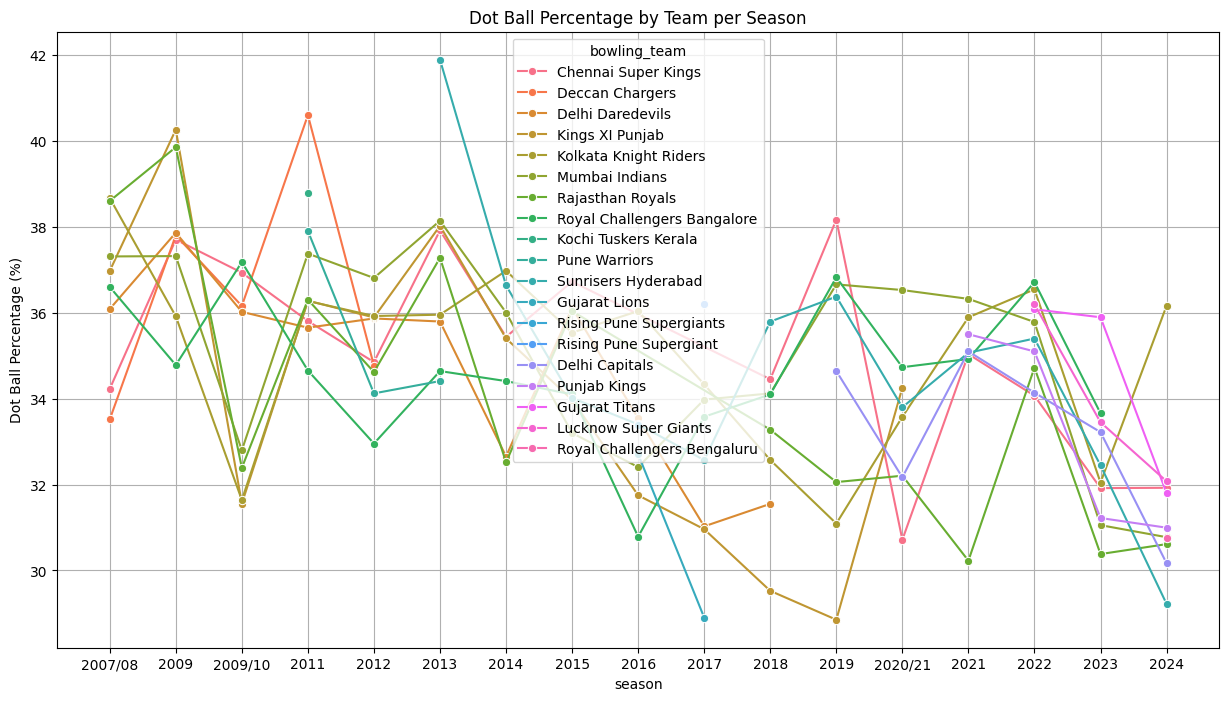

In [ ]:
# Plot
plt.figure(figsize=(15,8))
sns.lineplot(data=dot_data, x='season', y='dot_percentage', hue='bowling_team', marker='o')
plt.title('Dot Ball Percentage by Team per Season')
plt.ylabel('Dot Ball Percentage (%)')
plt.grid(True)
plt.show()



--- HOME VS AWAY PERFORMANCE ---


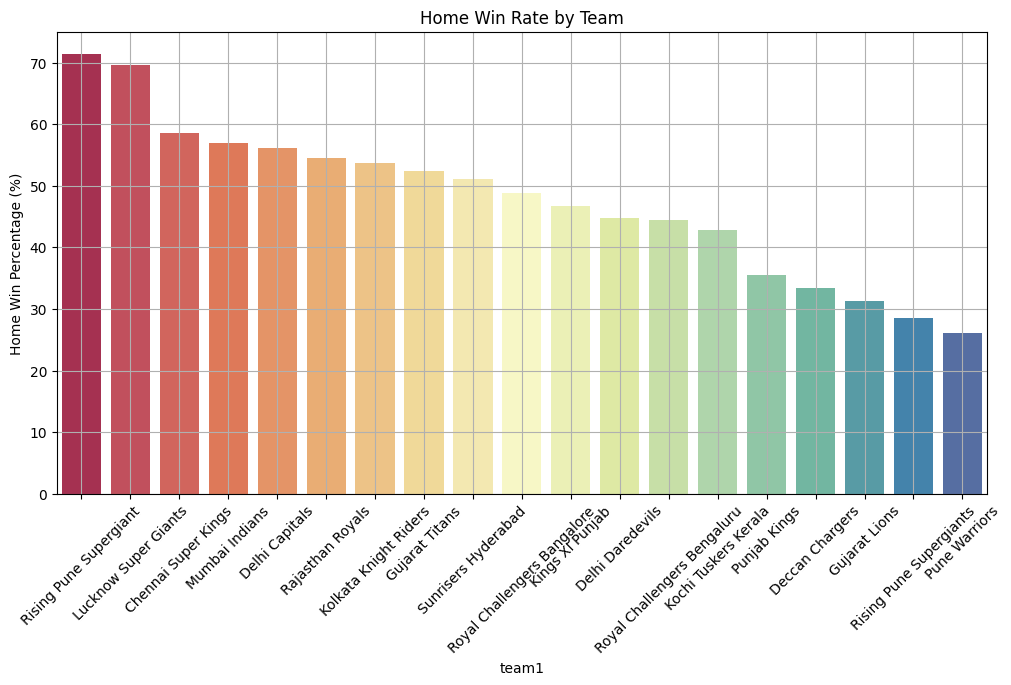

In [ ]:
print("\n--- HOME VS AWAY PERFORMANCE ---")

# Home team: team1 (by schedule)
matches['is_home_win'] = np.where(matches['winner'] == matches['team1'], 1, 0)

home_win_rate = matches.groupby('team1')['is_home_win'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12,6))
sns.barplot(x=home_win_rate.index, y=home_win_rate.values, palette='Spectral')
plt.xticks(rotation=45)
plt.ylabel('Home Win Percentage (%)')
plt.title('Home Win Rate by Team')
plt.grid(True)
plt.show()

In [ ]:
#Preprocessing for ML
#Preprocessing for ML
df = matches.dropna(subset=['winner'])  # Remove rows without winner

df_model = df[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']]

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder for 'toss_decision' on the entire column from matches
le_toss_decision = LabelEncoder()
le_toss_decision.fit(matches['toss_decision'])

# Encode the columns in df_model
for col in df_model.columns:
    if col == 'toss_decision':
        df_model[col] = le_toss_decision.transform(df_model[col])
    else:
        # For other columns, fit and transform using a new LabelEncoder
        le_other = LabelEncoder()
        df_model[col] = le_other.fit_transform(df_model[col])

X = df_model.drop('winner', axis=1)
y = df_model['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import necessary functions
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.4337899543378995

Confusion Matrix:
 [[20  0  1  0  0  0  1  0  0  0  3  0  0  0  0  0  2  0  0]
 [ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  2  0  0  0  1  0  0  0  1  0  0  0  0  0  1  0  0]
 [ 0  1  0  4  1  0  3  0  2  0  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  2  0  0  0  1  0  1  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  2  0  0  1  0  1  0  0  0  1  0  1  0  0]
 [ 0  1  1  2  0  0  6  0  1  0  2  0  0  0  3  0  3  0  2]
 [ 0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  1  0  0  0  0 15  1  0  0  0  0  4  0  1  0  3]
 [ 0  0  1  0  0  0  0  0  1  3  0  0  0  0  0  0  0  1  0]
 [ 4  2  0  1  0  1  0  0  2  0  8  0  0  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0  0  0  1  1  0  1  0  0]
 [ 4  0  0  0  0  0  0  0  1  0  3  1  0  2 11  0  2  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  

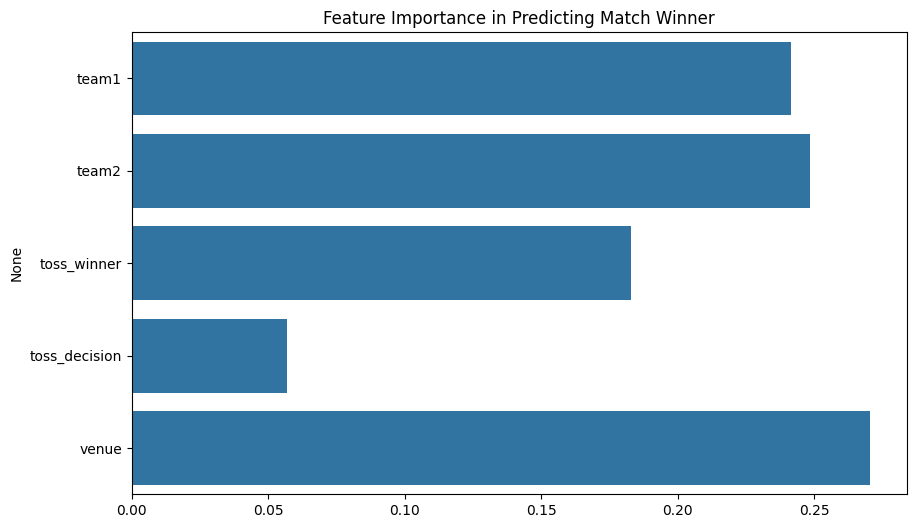

In [ ]:
#Feature Importance
importances = model.feature_importances_
feature_names = X.columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Predicting Match Winner")
plt.show()

In [ ]:
import pandas as pd #Make Custom Prediction Example
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Create separate LabelEncoders for each categorical feature for sample input
le_team = LabelEncoder()
le_toss_decision = LabelEncoder()
le_venue = LabelEncoder()
le_winner = LabelEncoder() # To inverse transform the prediction

# Fit the encoders on the full data from 'matches' to ensure all categories are captured
# Use pd.concat to combine the team columns and then get unique values
le_team.fit(pd.concat([matches['team1'], matches['team2']]).unique()) # Fit on all unique team names
le_toss_decision.fit(matches['toss_decision'].unique())
le_venue.fit(matches['venue'].unique())
le_winner.fit(matches['winner'].dropna().unique()) # Fit on unique winners (excluding NaNs if any remained)


sample_input = pd.DataFrame({
    'team1': [le_team.transform(['Mumbai Indians'])[0]],
    'team2': [le_team.transform(['Chennai Super Kings'])[0]],
    'toss_winner': [le_team.transform(['Mumbai Indians'])[0]],
    'toss_decision': [le_toss_decision.transform(['bat'])[0]],
    'venue': [le_venue.transform(['Wankhede Stadium'])[0]]
})

# Ensure the columns are in the same order as the training data
# Assuming X_train is available from previous steps
sample_input = sample_input[X_train.columns]


predicted_label = model.predict(sample_input)[0]
predicted_winner = le_winner.inverse_transform([predicted_label])
print("Predicted Winner:", predicted_winner[0])

Predicted Winner: Mumbai Indians


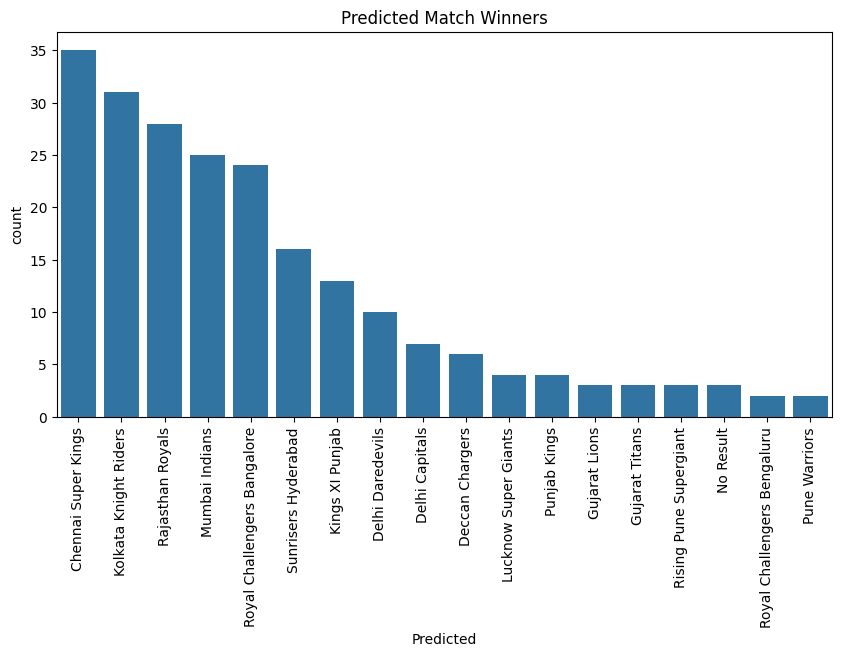

In [ ]:
# Use le_winner which was fitted on the target variable
y_pred_names = le_winner.inverse_transform(y_pred)
y_test_names = le_winner.inverse_transform(y_test)

comparison_df = pd.DataFrame({'Actual': y_test_names, 'Predicted': y_pred_names})
plt.figure(figsize=(10,5))
sns.countplot(data=comparison_df, x='Predicted', order=pd.Series(y_pred_names).value_counts().index)
plt.title("Predicted Match Winners")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Install required packages in Colab
!pip install ipywidgets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
# Load your IPL matches dataset (adjust path if needed)
matches = pd.read_csv('/content/IPL_matches.csv')  # Make sure this path is correct in your Colab

In [ ]:
# Create unique lists for widgets
teams = sorted(matches['team1'].dropna().unique().tolist())
seasons = sorted(matches['season'].dropna().unique().tolist())

In [ ]:
# Create dropdown widgets
team_widget = widgets.Dropdown(
    options=teams,
    description='Team:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

season_widget = widgets.Dropdown(
    options=seasons,
    description='Season:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

In [ ]:
# Output area
output = widgets.Output()

In [ ]:
# Define interactive function
def update_table(change):
    with output:
        clear_output(wait=True)
        selected_team = team_widget.value
        selected_season = season_widget.value

        filtered_matches = matches[
            ((matches['team1'] == selected_team) | (matches['team2'] == selected_team)) &
            (matches['season'] == selected_season)
        ][['date', 'team1', 'team2', 'venue', 'winner', 'toss_winner', 'toss_decision']]

        if not filtered_matches.empty:
            display(filtered_matches.reset_index(drop=True))
        else:
            print("No matches found for selected team and season.")

In [ ]:
# Attach function to widgets
team_widget.observe(update_table, names='value')
season_widget.observe(update_table, names='value')

In [ ]:
# Display widgets and output
display(widgets.VBox([team_widget, season_widget, output]))

In [ ]:
# Initial trigger to display data
update_table(None)